In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [43]:
df = pd.read_csv('Tata-steel.csv')
print(df.head())

        Date  Open Price  High Price  Low Price  Close Price         WAP  \
0  03-Jul-15      308.00      308.00     299.75       300.95  302.708180   
1  06-Jul-15      294.90      299.60     292.30       298.75  295.646338   
2  07-Jul-15      300.75      303.25     296.00       297.45  299.477691   
3  08-Jul-15      293.80      294.00     282.00       283.40  286.875105   
4  09-Jul-15      285.20      287.25     279.60       280.55  282.860975   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        499554           6430             151219082              118810.0   
1        663354           9184             196118181              117663.0   
2        877207           8581             262703927              211277.0   
3       1446189          20272             414875621              563505.0   
4        974983          13946             275784642              330248.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
0      

In [45]:
df.isnull().sum()
df.isna().any()

Date                         False
Open Price                   False
High Price                   False
Low Price                    False
Close Price                  False
WAP                          False
No.of Shares                 False
No. of Trades                False
Total Turnover (Rs.)         False
Deliverable Quantity          True
% Deli. Qty to Traded Qty     True
Spread High-Low              False
Spread Close-Open            False
dtype: bool

<Axes: >

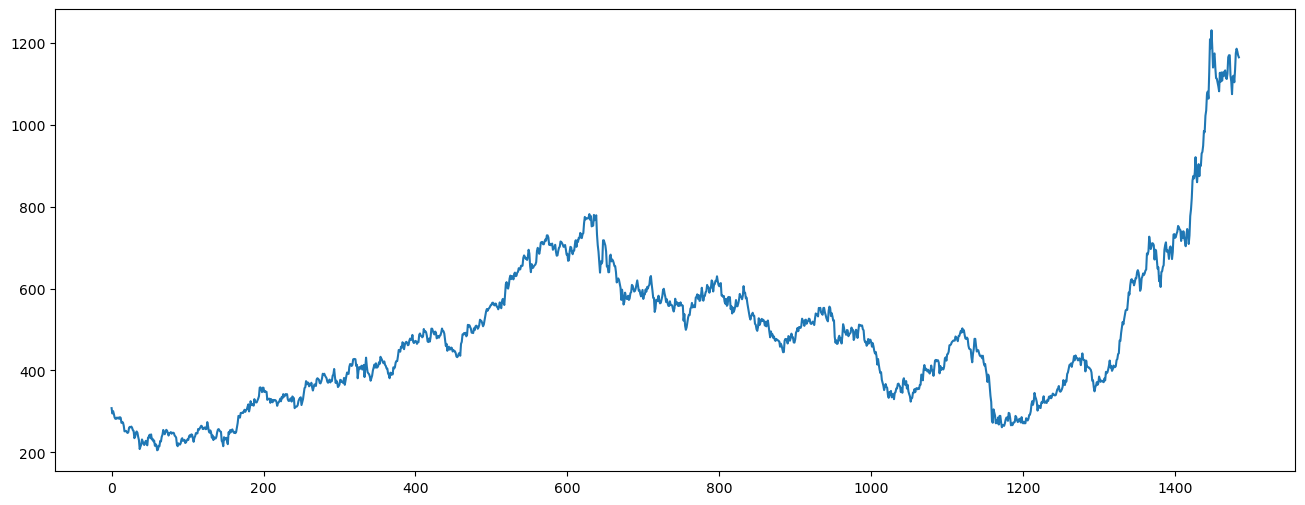

In [47]:
df['Open Price'].plot(figsize=(16,6))

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())
X = df[['Date_ordinal']]
y = df['Close Price']

C:\Users\VILAS\AppData\Local\Temp\ipykernel_25072\3582812565.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [51]:
degree = 3  # Degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:

y_pred = model.predict(X_test)

In [59]:
next_month_dates_ordinal = np.array([df['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]).astype('datetime64[D]').astype(int) + 719163
next_month_dates_poly = poly_features.transform(next_month_dates_ordinal.reshape(-1, 1))
next_month_pred = model.predict(next_month_dates_poly)

C:\Users\VILAS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [61]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 31282.86082043717


In [63]:
X_test_dates = [datetime.fromordinal(int(date)) for date in X_test[:, 1]]
next_month_dates = [datetime.fromordinal(date) for date in next_month_dates_ordinal]

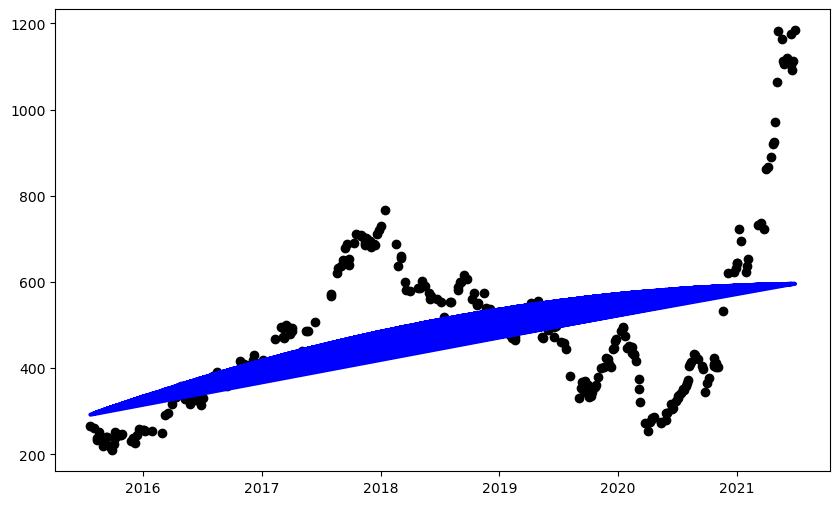

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_dates, y_test, color='black', label='Actual data')
plt.plot(X_test_dates, y_pred, color='blue', linewidth=3, label='Polynomial regression line')

In [67]:
# Create a DataFrame for the next month's predictions
next_month_df = pd.DataFrame({
    'Date': next_month_dates,
    'Predicted_Close': next_month_pred
})

# Display the DataFrame
print(next_month_df)

         Date  Predicted_Close
0  2021-07-03       595.672193
1  2021-07-04       595.683396
2  2021-07-05       595.694480
3  2021-07-06       595.705445
4  2021-07-07       595.716291
5  2021-07-08       595.727019
6  2021-07-09       595.737628
7  2021-07-10       595.748119
8  2021-07-11       595.758490
9  2021-07-12       595.768743
10 2021-07-13       595.778878
11 2021-07-14       595.788893
12 2021-07-15       595.798790
13 2021-07-16       595.808569
14 2021-07-17       595.818228
15 2021-07-18       595.827769
16 2021-07-19       595.837192
17 2021-07-20       595.846495
18 2021-07-21       595.855680
19 2021-07-22       595.864746
20 2021-07-23       595.873694
21 2021-07-24       595.882523
22 2021-07-25       595.891233
23 2021-07-26       595.899824
24 2021-07-27       595.908297
25 2021-07-28       595.916651
26 2021-07-29       595.924887
27 2021-07-30       595.933003
28 2021-07-31       595.941001
29 2021-08-01       595.948881
